In [16]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline
import random
from math import fsum
from math import sqrt
from copy import deepcopy

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
def distance(v1, v2, ax=1):
    return np.linalg.norm(v1 - v2, axis=ax)  # Distance between dots & centroids

In [36]:
class KMeans:
    def __init__(self, n_clusters, max_iter=500):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        n_samples = len(X)
        centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        centroids_old = np.zeros(centroids.shape)   # Shape - array size
        clusters = np.zeros(n_samples)  # Х - 0 matrix size

        while True:
            for i in range(n_samples):
                distances = distance(X[i,], centroids)
                clusters[i] = distances.argmin()
            centroids_old = deepcopy(centroids)
            for k in range(self.n_clusters):
                centroids[k] = X[clusters == k,].mean(axis=0)   # Match centroids to clusters
            error = distance(centroids, centroids_old, None)
            if (error >= 0) and (error <= 0.01):
                self.clusters = clusters.astype("int")  # Element's own to a cluster
                self.centroids = centroids
                break

    def predict(self, y):
        y_unique = np.unique(y)  # Distinguish clusters
        y_unique_num = [i for i in range(len(np.unique(y)))]    # Cluster numbers
        n_samples = len(X)
        clusters = np.zeros(n_samples)  # Х - 0 matrix size
        for k in range(n_samples):  # Assign numbers (instead of names) to clusters
            for j in range(self.n_clusters):
                if y[k][0] == y_unique[j]:
                    y[k] = y_unique_num[j]
            clusters[k] = y[k]
        centroids = X[np.random.choice(X.shape[0], self.n_clusters,
                                       replace=False)]   # X.shape[0] - lines
        centroids_old = np.zeros(centroids.shape)  # Shape - array size
        while True:
            centroids_old = deepcopy(centroids)
            error = distance(centroids, centroids_old, None)
            if error == 0:
                self.clusters = clusters.astype(int)
                self.centroids = centroids
        return self.centroids, self.clusters


In [38]:
iris = pd.read_csv("iris.csv")

In [39]:
X = df.loc[:, df.columns != "Name"].as_matrix()

In [40]:
model = KMeans(3)
model.fit(X)

In [42]:
clusters = model.clusters
plt.figure(figsize=(14, 7))
colormap = np.array(["red", "blue", "black"])

<Figure size 1008x504 with 0 Axes>

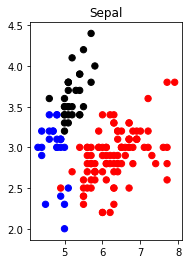

In [43]:
plt.subplot(1, 2, 1)
plt.scatter(df.SepalLength, df.SepalWidth, c=colormap[clusters], s=40)
plt.title("Sepal")
plt.show()